In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading our Image
img = cv2.imread("car1.jpg")

In [4]:
# BRG -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
# Shape of input Image
img.shape

(500, 500, 3)

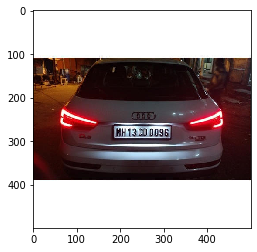

In [6]:
plt.imshow(img)


In [7]:
# Reszing image for YOLO [Square Image]
img_height   =   500
img_width    =    500
im = cv2.resize(img, (img_height, img_width))

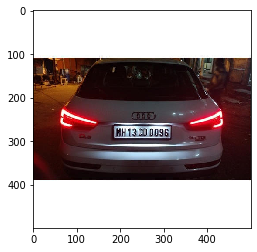

In [8]:
plt.imshow(im)


In [9]:
image = im.copy()


# Yolo model

In [10]:
# Classes
Classes = "LP"
# Model
Model = "darknet-yolov3.cfg"
# Weights
Weights = "lapi.weights"

In [11]:
# Setting Model
net = cv2.dnn.readNetFromDarknet(Model, Weights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [12]:
# Creating 4-D blob from an image
blob = cv2.dnn.blobFromImage(image, 1/255, (800, 800), [0,0,0], 1, crop=False)

In [13]:

# Set input to the Network
net.setInput(blob)

In [14]:
# Get names of all Layers in the Network
layersNames_1 = net.getLayerNames()

In [15]:

# Get names of Unconnected (Output) layer
qwer = [layersNames_1[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [16]:
print (qwer)


['yolo_82', 'yolo_94', 'yolo_106']


In [17]:
# Passing input to the network
outs = net.forward(qwer)

# Processing detected Boxes

In [19]:
classIds = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        # Extracting Score
        scores = detection[5:]
        classId = np.argmax(scores)
        confidence = scores[classId]
        # Score of detection is 50%
        if confidence > 0.5:
            # Center of the Box
            center_x = int(detection[0] * img_width)
            center_y = int(detection[1] * img_height)
            # Cordinates of Left top Corner
            w = int(detection[2] * img_width)
            h = int(detection[3] * img_height)
            # Width and Height of the box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            # Saving Information for Choosing best Box
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# Selecting best Box NMS (Non Maximal Suppression)

In [20]:
# Keep boxes of highest scores and the minimum overlap with other elements in the list.
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]

In [21]:
# Plotting the detected Number Plate
image = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 10)


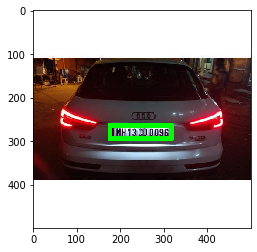

In [22]:
plt.imshow(image)

In [23]:
# Saving Processed Image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('Processed.jpg',image)


True

# Cropping out The License Plate

In [29]:
# Cropping out License Plate
detected_number_Plate = im[y:y+h, x:x+w]

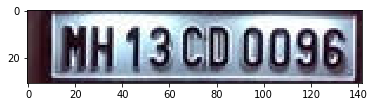

In [30]:
 #Visualizing License Plate
plt.imshow(Plate)

In [31]:
# Saving License Plate
cv2.imwrite('detected_number_Plate.jpg',Plate)

True